In [3]:
import keras.layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import src.python.yalefaces as yalefaces
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X, y = yalefaces.load("../datasets/yalefaces", flatten=False)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24, stratify=y)

In [6]:
# Build a simple model
inputs = keras.Input(shape=(243, 320))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(15, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=30)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 243, 320)]        0         
                                                                 
 rescaling (Rescaling)       (None, 243, 320)          0         
                                                                 
 flatten (Flatten)           (None, 77760)             0         
                                                                 
 dense (Dense)               (None, 128)               9953408   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 15)                1935      
                                                                 
Total params: 9,971,855
Trainable params: 9,971,855
Non-train

In [7]:
# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)

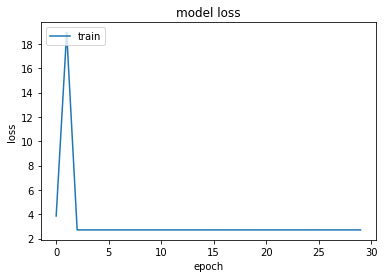

In [8]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()